In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [2]:
X, y = make_regression(n_samples=100, n_features=4, noise=1, random_state=42)

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

score = ridge.score(X_test, y_test)
y_pred = ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print(f"R2: {r2_1}") # R2: 0.9995095874632411
print(f"MAE: {mae}") # MAE: 1.49470473924811
print(f"MSE: {mse}") # MSE: 3.1294459058662483
print(f'Score: {score}') # Score: 0.9995095874632411

R2: 0.9995095874632411
MAE: 1.49470473924811
MSE: 3.1294459058662483
Score: 0.9995095874632411


In [6]:

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
}

gs = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='r2')

gs.fit(X_train, y_train)

print(f"Best params: {gs.best_params_}")
print(f"Best score: {gs.best_score_}")

y_pred = gs.predict(X_test)

mae2 = mean_absolute_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print(f"MAE: {mae2}") # MAE: 0.8918539485169852
print(f"MSE: {mse2}") # MSE: 1.0902720786113953
print(f"R2: {r2_2}") # R2: 0.9998291444837482
print(f'Score: {gs.score(X_test, y_test)}') # 0.9998629370578629

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'alpha': 0.001}
Best score: 0.9998629370578629
MAE: 0.8918539485169852
MSE: 1.0902720786113953
R2: 0.9998291444837482
Score: 0.9998291444837482


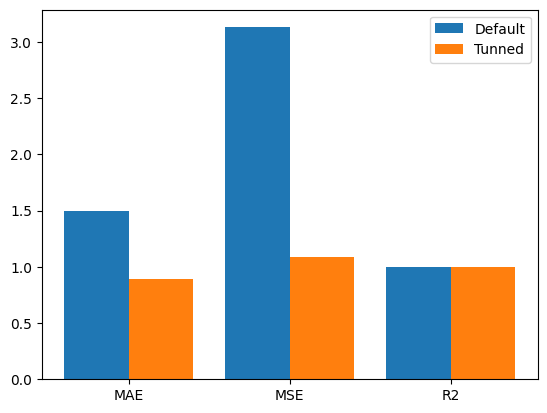

In [7]:
# Compare by barplot default model and tunned model (MAE, R2, MSE)

import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'R2']
default = [mae, mse, r2_1]
tunned = [mae2, mse2, r2_2]

x = range(len(metrics))

plt.bar(x, default, width=0.4, label='Default')
plt.bar([i+0.4 for i in x], tunned, width=0.4, label='Tunned')

plt.xticks([i+0.2 for i in x], metrics)
plt.legend()
plt.show()